
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


## Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data preprocessing

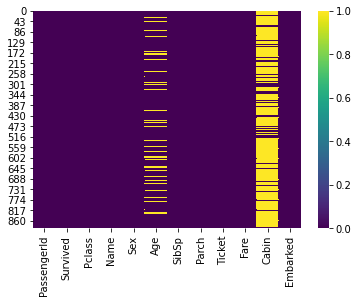

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
df = df.drop(['Cabin', 'Age'], axis = 1)

INFERENCE : Cabin contains many Null values so its better to drop these colomns

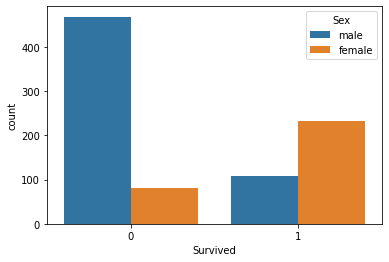

In [ ]:
sns.countplot(x='Survived',data=df,hue='Sex')

INFERENCE : Count of males survived is lesser then count of females.

In [ ]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)
Sex = pd.get_dummies(df['Sex'], drop_first=True)
df.drop(['Sex', 'Embarked', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
df=pd.concat([df,Embarked,Sex],axis=1)
df.head(5)

,Survived,Pclass,SibSp,Parch,Fare,Q,S,male
0,0,3,1,0,7.2500,0,1,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,0,1,0
3,1,1,1,0,53.1000,0,1,0
4,0,3,0,0,8.0500,0,1,1


In [ ]:
X=df.iloc[:,1:]
Y=df['Survived']

## Normalization




In [ ]:
def normalize(X):
    return (X-X.min(0))/(X.max(0)-X.min(0))

def concatenate_ones(x):
    ones = np.ones(shape = x.shape[0]).reshape(-1,1)
    return np.concatenate((ones, x), 1)
    
X = normalize(X)
X = concatenate_ones(X)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 55)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
m = X_train.shape[0]        #-----------------> No. of training data
n = X_train.shape[1]        #-----------------> No. of features

## Logistic regression model from scratch

In [ ]:
learning_rate = 0.1
epochs = 2100

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, weights):
    A = sigmoid(x.dot(weights))
    return -1/m*(np.dot(y.T,np.log(A))+(np.dot((1-y).T,np.log(1-A))))

def gradient_descent(x, y, weights, learning_rate, epochs):
    cost_history = np.zeros(epochs)
    for i in range(epochs):
        cost = compute_cost(x,y,weights)
        predictions = sigmoid(x.dot(weights))
        errors = np.subtract(predictions, y)
        sum_delta = (learning_rate / m) * x.transpose().dot(errors);
        weights = weights - sum_delta;
        cost_history[i] = cost
    return weights, cost_history
    
weights = np.zeros(n).reshape(-1,1)
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

## Plotting cost function vs epochs

Text(0, 0.5, 'cost (J)')

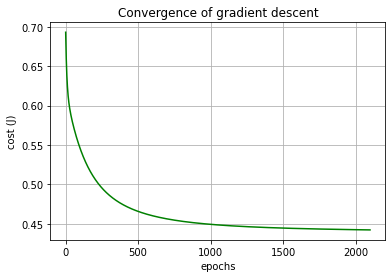

In [ ]:
plt.plot(range(1, epochs +1), cost_history, color ='green')
plt.rcParams["figure.figsize"] = (16,10)
plt.grid()
plt.title("Convergence of gradient descent")
plt.xlabel("epochs")
plt.ylabel("cost (J)")

## Predictions on Test Data

In [ ]:
predicted_price = sigmoid(X_test.dot(weights))
Y_prediction = np.zeros(predicted_price.shape[0]).reshape(-1,1)
for i in range(predicted_price.shape[0]):
    if predicted_price[i,0]>0.5:
        Y_prediction[i,0]=1 
    else:
        Y_prediction[i,0]=0
print("Classification Report")
print("---------------------\n")
print(classification_report(y_test, Y_prediction))

Classification Report
---------------------

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       158
           1       0.76      0.65      0.70       110

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
print("Confusion Matrix")
print("----------------\n")
print(confusion_matrix(y_test, Y_prediction))

Confusion Matrix
----------------

[[136  22]
 [ 39  71]]


## Logistic regression model using sklearn

In [ ]:
classifier = LogisticRegression()
model=classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification Report")
print("---------------------\n")
print(classification_report(y_test, predictions))
print("\n\nConfusion Matrix")
print("----------------\n")
print(confusion_matrix(y_test, predictions))

Classification Report
---------------------

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       158
           1       0.79      0.65      0.71       110

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



Confusion Matrix
----------------

[[139  19]
 [ 39  71]]
